## Practical Work 2

Develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [108]:
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [39]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [40]:
X.shape

(50,)

In [41]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

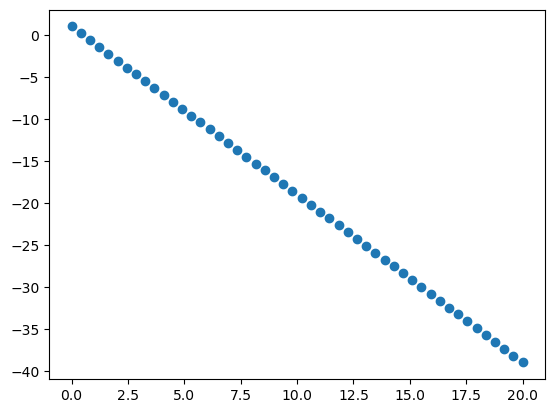

In [42]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [59]:
def gradient_desecent_single_variable(X, y, alpha, max_iter):

    theta_0 = 0
    theta_1 = 0
    m =len(y)
    stopping_threshold = 0.001
    converging_threshold = 0.001
    losses = []
    theta_0_values = []
    theta_1_values = []
    hypothesis_output = []

    for i in range(max_iter):
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        predicted_y = theta_0 + theta_1 * X
        hypothesis_output.append(predicted_y)
        error_vector = predicted_y - y
        mse = np.sum(error_vector**2) / (2 * m)
        losses.append(mse)
        d_theta_0 = (1/m)*np.sum(error_vector)
        d_theta_1 = (1/m)*np.sum(error_vector*X)
        
        grad_vector = np.array([d_theta_0, d_theta_1])
        grad_vector = grad_vector.reshape(2,1)
        grad_vector_norm = np.linalg.norm(grad_vector)
        
        if (grad_vector_norm < stopping_threshold) or (i !=0 and (abs(losses[i-1] - mse) < converging_threshold)):
            print("****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs")
            print("\ntheta_0_optw :", theta_0)
            print("theta_1_opt :", theta_1)
            print('\nError Vector:\n', error_vector)
            print('\ncost =', mse)
            print('\nh(x) = y_predict:\n', predicted_y)
            print("\ny_actual:\n", y)
            break

        theta_0 -= alpha * d_theta_0
        theta_1 -= alpha * d_theta_1

        print(f"****************** Iteration {i} ********************\n")
        print('h(x):\n',predicted_y)
        print('\nError Vector:\n',error_vector)
        print('\nj = ',mse)
        print('\nGradient Vector:\n',grad_vector)
        print('\nGradient Vector Norm:',grad_vector_norm)
        print("\ntheta_0_new :", theta_0)
        print("theta_1_new :", theta_1)

    return theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [64]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_single_variable(X, y, alpha=0.0005, max_iter=300)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204087

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm: 260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.1296

#### Calculate r2 score

In [65]:
r2_score(y, predicted_y)

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

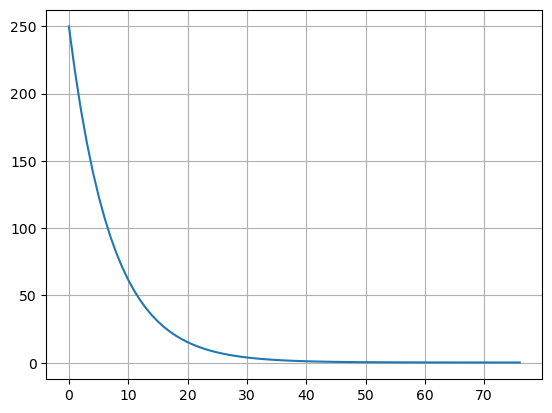

In [67]:
plt.plot(losses)
plt.grid()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

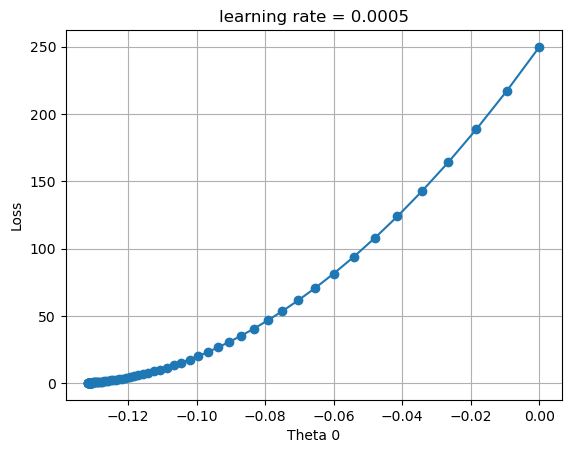

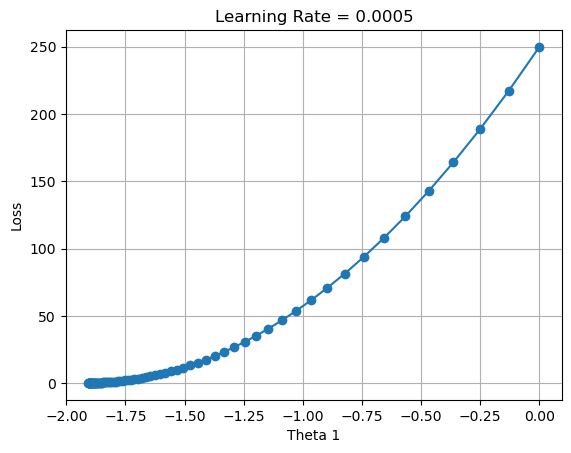

In [79]:

plt.plot(theta_0_values, losses, '-o')
plt.title('learning rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.plot(theta_1_values, losses, '-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.grid()
plt.show()

#### Plot all regression lines till converge

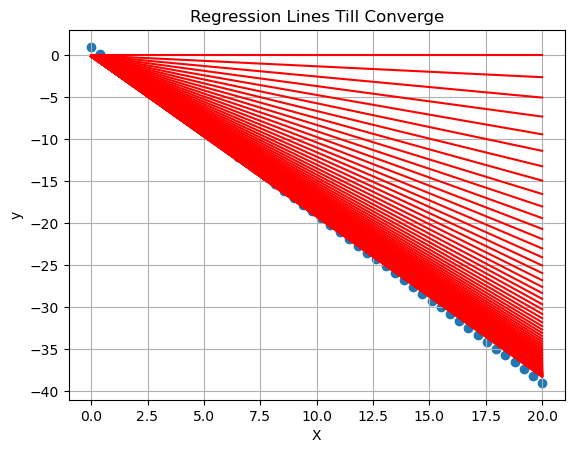

In [84]:
plt.scatter(X, y, marker='o')

for t0, t1 in zip(theta_0_values, theta_1_values):
    plt.plot(X, t0 + t1 * X, color='red')

plt.title('Regression Lines Till Converge')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

#### Plot the best regression line

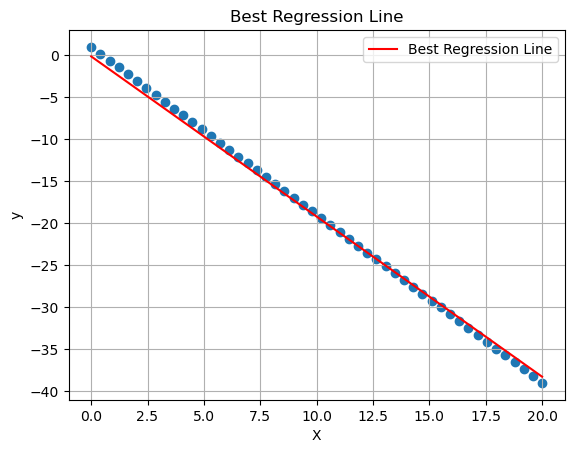

In [88]:
plt.scatter(X, y, marker='o')

plt.plot(X, predicted_y, color='red', label='Best Regression Line')

plt.title('Best Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [89]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_single_variable(X, y, alpha=0.00005, max_iter=1000)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204087

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm: 260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.012

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [91]:
r2_score = r2_score(y, predicted_y)
print("r2_score: ", r2_score)

r2_score:  0.9965793400861428


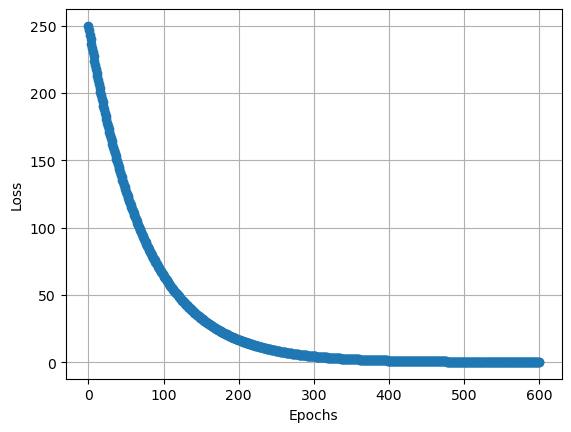

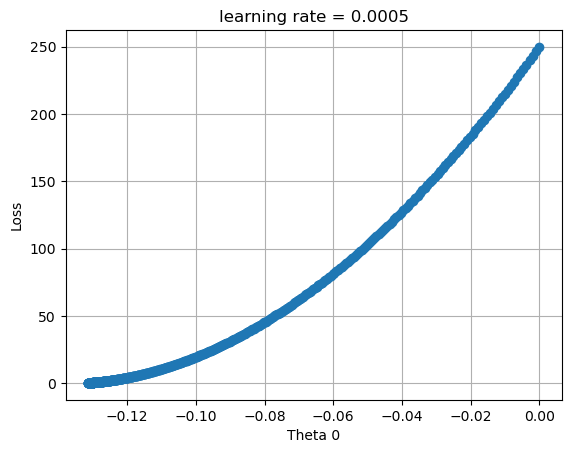

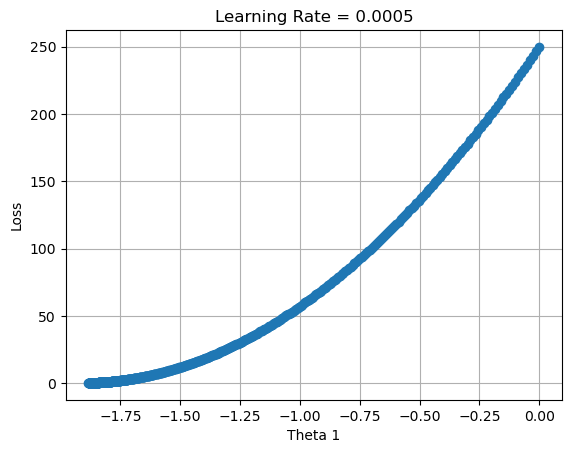

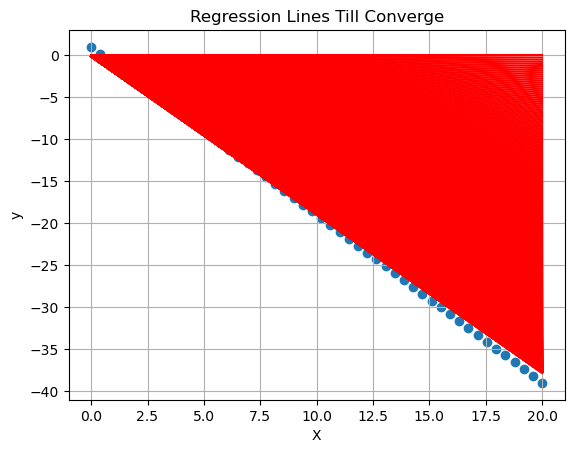

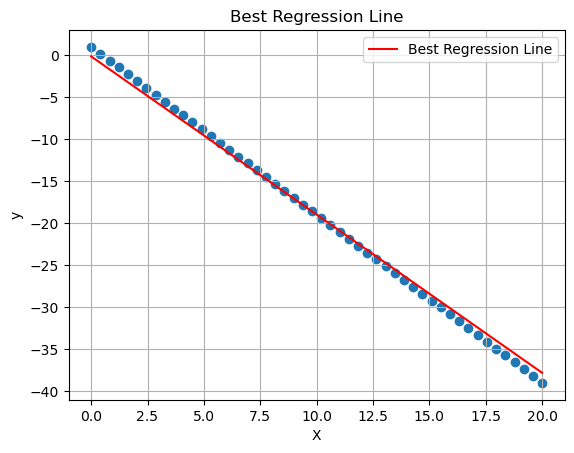

In [101]:
# Plot loss vs. epochs
plt.plot(losses, '-o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_0 vs. loss
plt.plot(theta_0_values, losses, '-o')
plt.title('learning rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_1 vs. loss
plt.plot(theta_1_values, losses, '-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot all regression lines till converge
plt.scatter(X, y, marker='o')
for t0, t1 in zip(theta_0_values, theta_1_values):
    plt.plot(X, t0 + t1 * X, color='red')
plt.title('Regression Lines Till Converge')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

# Plot the best regression line
plt.scatter(X, y, marker='o')
plt.plot(X, predicted_y, color='red', label='Best Regression Line')
plt.title('Best Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [102]:
theta_0_values, theta_1_values, losses, predicted_y, hypothesis_output, theta_0, theta_1 = gradient_desecent_single_variable(X, y, alpha=0.005, max_iter=300)

****************** Iteration 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j =  249.88775510204087

Gradient Vector:
 [[ 19.       ]
 [259.3877551]]

Gradient Vector Norm: 260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.29693

In [107]:
r2_score = r2_score(y, predicted_y)
print("r2_score: ", r2_score)

r2_score:  0.9976200723230484


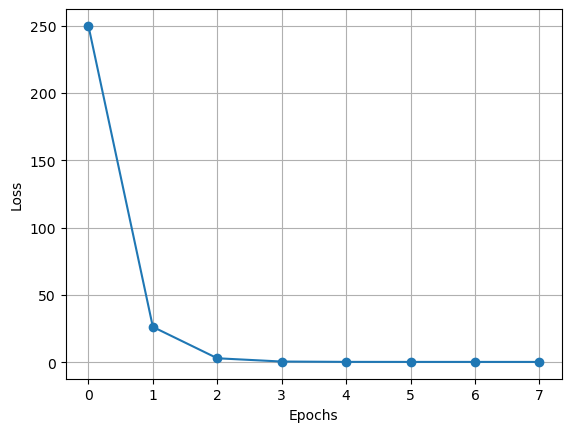

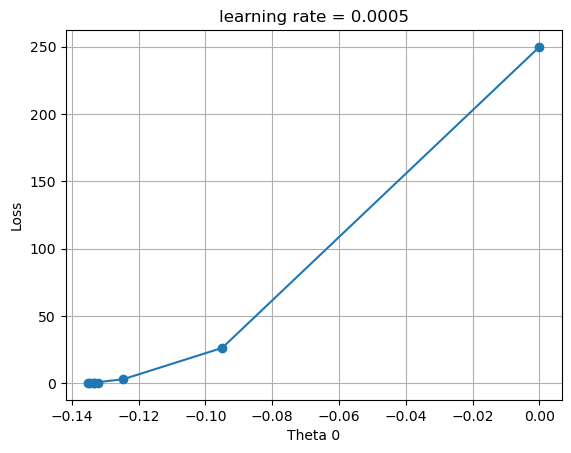

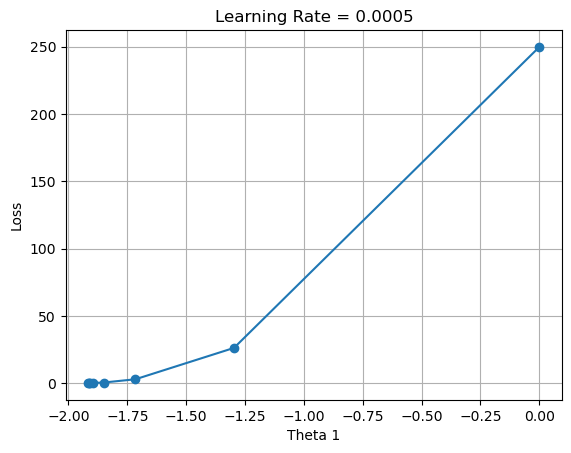

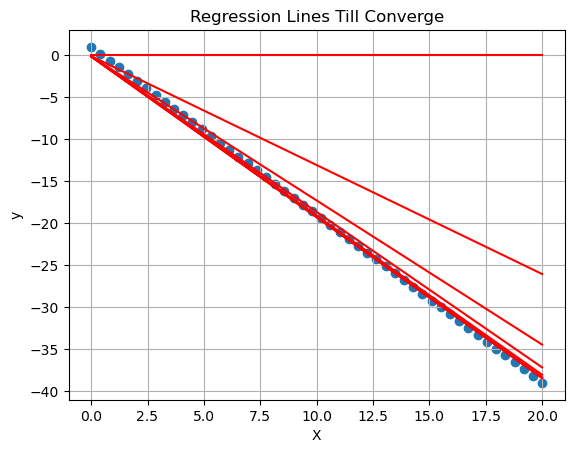

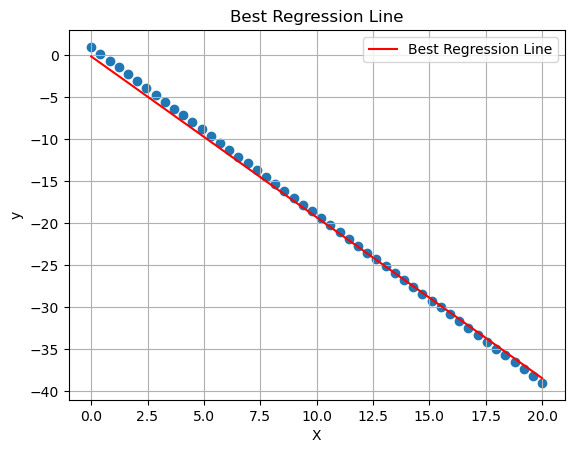

In [104]:
# Plot loss vs. epochs
plt.plot(losses, '-o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_0 vs. loss
plt.plot(theta_0_values, losses, '-o')
plt.title('learning rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_1 vs. loss
plt.plot(theta_1_values, losses, '-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot all regression lines till converge
plt.scatter(X, y, marker='o')
for t0, t1 in zip(theta_0_values, theta_1_values):
    plt.plot(X, t0 + t1 * X, color='red')
plt.title('Regression Lines Till Converge')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

# Plot the best regression line
plt.scatter(X, y, marker='o')
plt.plot(X, predicted_y, color='red', label='Best Regression Line')
plt.title('Best Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [191]:
def St_GD_LR_1var(X, y, alpha, epoch):
    np.random.seed(101)
    data = np.column_stack((X,y))
    data = shuffle(data)
    X = data[:,:-1]
    y = data[:,-1]

    theta_0_St = 0
    theta_1_St = 0
    m =len(y)
    stopping_threshold = 0.001
    converging_threshold = 0.001
    loss_St = []
    all_theta_0_St = []
    all_theta_1_St = []
    hypothesis_output = []

    for i in range(m):
        for j in range(epoch):
            all_theta_0_St.append(theta_0_St)
            all_theta_1_St.append(theta_1_St)
            predicted_y = theta_0_St + theta_1_St * X[j]
            hypothesis_output.append(predicted_y)
            error_vector = np.sum(predicted_y - y[j])
            mse=np.sum(error_vector**2)/2
            loss_St.append(np.reshape(mse, (-1)))
            d_theta_0_St =np.sum(error_vector)
            d_theta_1_St =np.sum((error_vector) * X[j])
            
            grad_vector = np.array([d_theta_0_St, d_theta_1_St])
            grad_vector = grad_vector.reshape(2,1)
            grad_vector_norm = np.linalg.norm(grad_vector)
            
            if grad_vector_norm < stopping_threshold:
                return all_theta_0_St, all_theta_1_St, loss_St, theta_0_St, theta_1_St 

            theta_0_St -= alpha * d_theta_0_St
            theta_1_St -= alpha * d_theta_1_St

        print(f"****************** Epoch {i} ********************\n")
        print('h(x):\n',predicted_y)
        print('\nError Vector:\n',error_vector)
        print('\nj = ',mse)
        print('\nGradient Vector:\n', grad_vector)
        print('\nGradient Vector Norm:', grad_vector_norm)
        print("\ntheta_0_opt :", theta_0_St)
        print("theta_1_opt :", theta_1_St)
        
        if ((i > 1) and (abs(losses[-1] - losses[-(m+1)]) < converging_threshold)):
            break
    print("****************** Training Report ********************\n")
    print(f"Gradient Descent converged after {i} epochs")
    print("\ntheta_0_opt :", theta_0_St)
    print("theta_1_opt :", theta_1_St)
    print('\ncost =', mse)
    return all_theta_0_St, all_theta_1_St, loss_St, theta_0_St, theta_1_St 

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [192]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.0005,300)

****************** Epoch 0 ********************

h(x):
 [-23.59605273]

Error Vector:
 0.7100697213655529

j =  0.25209950460007696

Gradient Vector:
 [[0.71006972]
 [8.98455566]]

Gradient Vector Norm: 9.012571185993627

theta_0_opt : -0.12761222125212127
theta_1_opt : -1.8592841835063174
****************** Epoch 1 ********************

h(x):
 [-24.28728304]

Error Vector:
 0.0188394137247343

j =  0.00017746175474585356

Gradient Vector:
 [[0.01883941]
 [0.23837626]]

Gradient Vector Norm: 0.23911955711901475

theta_0_opt : -0.12397684636948911
theta_1_opt : -1.909800583000258
****************** Epoch 2 ********************

h(x):
 [-24.30585457]

Error Vector:
 0.0002678768054096281

j =  3.587899143823388e-08

Gradient Vector:
 [[0.00026788]
 [0.00338946]]

Gradient Vector Norm: 0.0034000305958517907

theta_0_opt : -0.1168602386254817
theta_1_opt : -1.9117125478064034
****************** Training Report ********************

Gradient Descent converged after 2 epochs

theta_0_opt : -

In [16]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.0005,300)

****************** Epoch 0 ********************

Cost = 0.25209950460007696

Gradient Vector:
[[0.71006972]
 [8.98455566]]

Gradient Vector Norm:
9.012571185993627

theta_0_new : -0.1272571863914385
theta_1_new : -1.85479190567727

****************** Epoch 1 ********************

Cost = 0.00017746175474585356

Gradient Vector:
[[0.01883941]
 [0.23837626]]

Gradient Vector Norm:
0.23911955711901475

theta_0_new : -0.12396742666262674
theta_1_new : -1.9096813948726117

****************** Epoch 2 ********************

Cost = 3.587899143823388e-08

Gradient Vector:
[[0.00026788]
 [0.00338946]]

Gradient Vector Norm:
0.0034000305958517907

theta_0_new : -0.116860104687079
theta_1_new : -1.9117108530755937

****************** Training Report ********************

Gradient Descent converged after 3 epochs

theta_0_Opt : -0.116860104687079
theta_1_Opt : -1.9117108530755937

Cost = 3.587899143823388e-08



In [193]:
r2_score(y, predicted_y)

0.9976200723230484

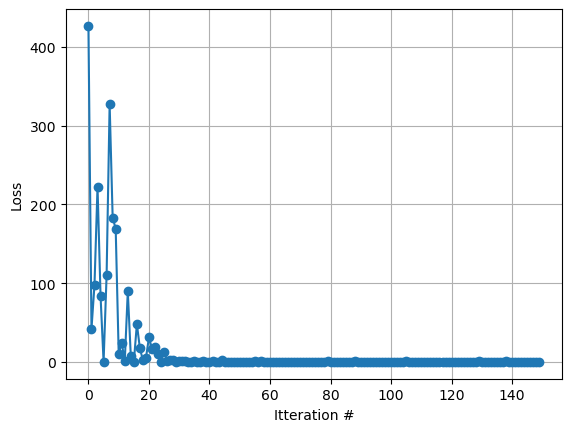

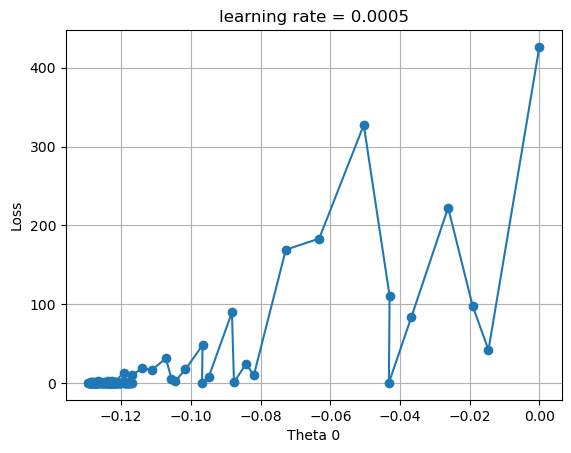

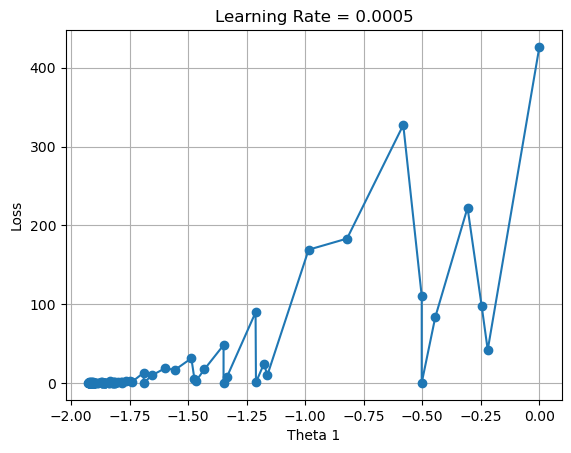

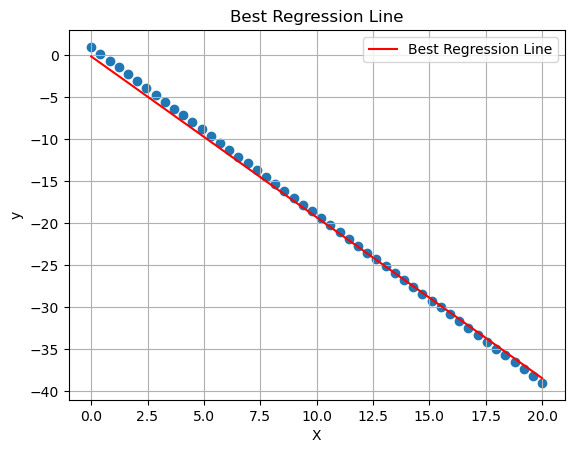

In [194]:
# Plot loss vs. itterations
plt.plot(loss_St, '-o')
plt.xlabel('Itteration #')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_0 vs. loss
plt.plot(all_theta_0_St, loss_St, '-o')
plt.title('learning rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_1 vs. loss
plt.plot(all_theta_1_St, loss_St, '-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot the best regression line
plt.scatter(X, y, marker='o')
plt.plot(X, predicted_y, color='red', label='Best Regression Line')
plt.title('Best Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [195]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.0001,300)

****************** Epoch 0 ********************

h(x):
 [-11.88973051]

Error Vector:
 12.41639194123338

j =  77.08339441916262

Gradient Vector:
 [[ 12.41639194]
 [157.10536742]]

Gradient Vector Norm: 157.59525139074904

theta_0_opt : -0.0684094452130673
theta_1_opt : -0.9500743631688013
****************** Epoch 1 ********************

h(x):
 [-18.07969583]

Error Vector:
 6.226426614138166

j =  19.384194190624033

Gradient Vector:
 [[ 6.22642661]
 [78.78335716]]

Gradient Vector Norm: 79.02901842704571

theta_0_opt : -0.10214664348275128
theta_1_opt : -1.428733851630339
****************** Epoch 2 ********************

h(x):
 [-21.19788774]

Error Vector:
 3.1082347110398487

j =  4.830561509456486

Gradient Vector:
 [[ 3.10823471]
 [39.3286841 ]]

Gradient Vector Norm: 39.45131830456044

theta_0_opt : -0.11841844022588549
theta_1_opt : -1.6699154908906342
****************** Training Report ********************

Gradient Descent converged after 2 epochs

theta_0_opt : -0.1184184402

In [196]:
r2_score(y, predicted_y)

0.9976200723230484

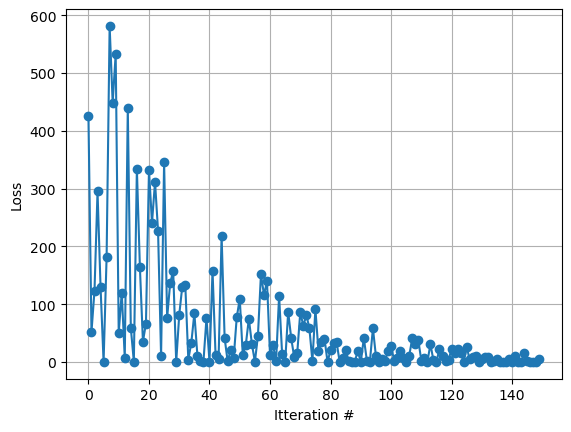

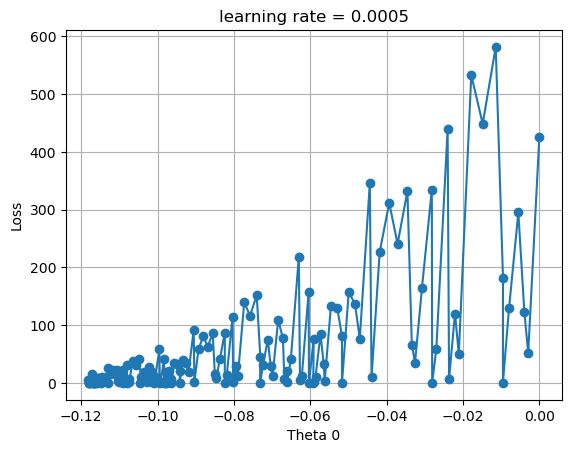

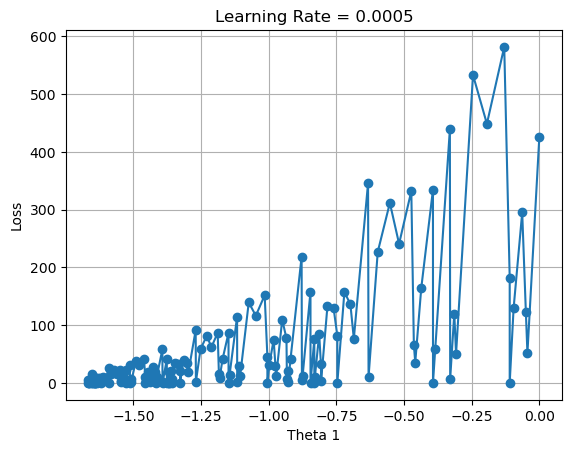

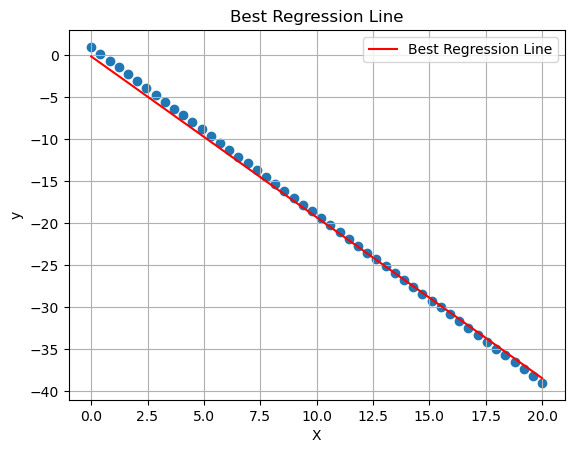

In [198]:
# Plot loss vs. itterations
plt.plot(loss_St, '-o')
plt.xlabel('Itteration #')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_0 vs. loss
plt.plot(all_theta_0_St, loss_St, '-o')
plt.title('learning rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_1 vs. loss
plt.plot(all_theta_1_St, loss_St, '-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot the best regression line
plt.scatter(X, y, marker='o')
plt.plot(X, predicted_y, color='red', label='Best Regression Line')
plt.title('Best Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

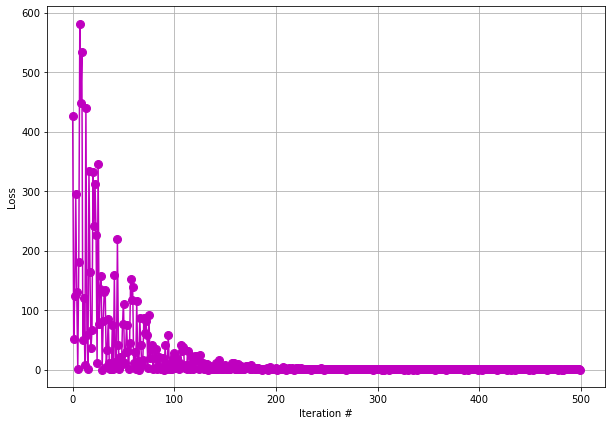

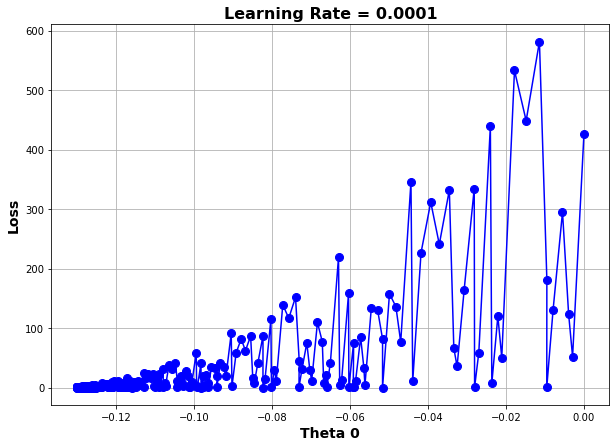

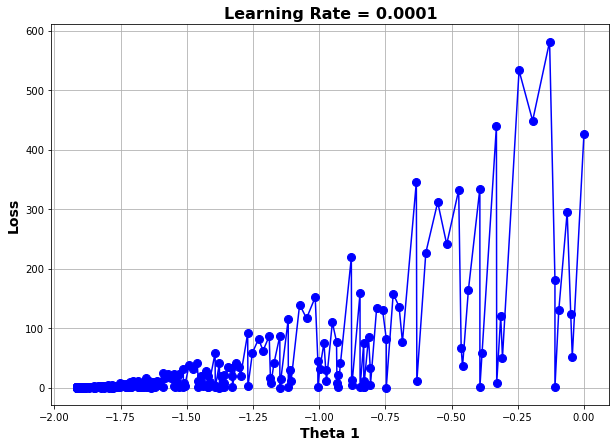

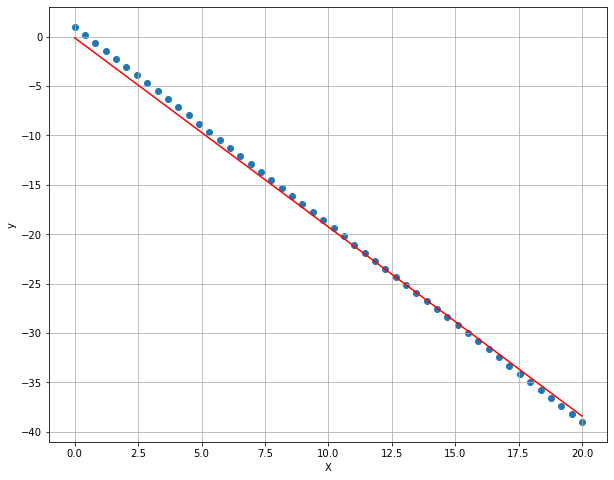

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [199]:
all_theta_0_St,all_theta_1_St,loss_St,opt_theta_0_St,opt_theta_1_St  = St_GD_LR_1var(X,y,0.00007,300)

****************** Epoch 0 ********************

h(x):
 [-9.08935763]

Error Vector:
 15.216764815571986

j =  115.77496572621477

Gradient Vector:
 [[ 15.21676482]
 [192.53865685]]

Gradient Vector Norm: 193.13902845642275

theta_0_opt : -0.0526625963181957
theta_1_opt : -0.7277523032709559
****************** Epoch 1 ********************

h(x):
 [-14.89589587]

Error Vector:
 9.410226574128345

j =  44.27618208821564

Gradient Vector:
 [[  9.41022657]
 [119.06817298]]

Gradient Vector Norm: 119.43944985086782

theta_0_opt : -0.08492087485410607
theta_1_opt : -1.1789316302972381
****************** Epoch 2 ********************

h(x):
 [-18.49548064]

Error Vector:
 5.810641813418087

j =  16.881779141921317

Gradient Vector:
 [[ 5.81064181]
 [73.52240662]]

Gradient Vector Norm: 73.75166325784151

theta_0_opt : -0.10453040045312463
theta_1_opt : -1.4586570394661047
****************** Training Report ********************

Gradient Descent converged after 2 epochs

theta_0_opt : -0.104530

In [200]:
r2_score(y, predicted_y)

0.9976200723230484

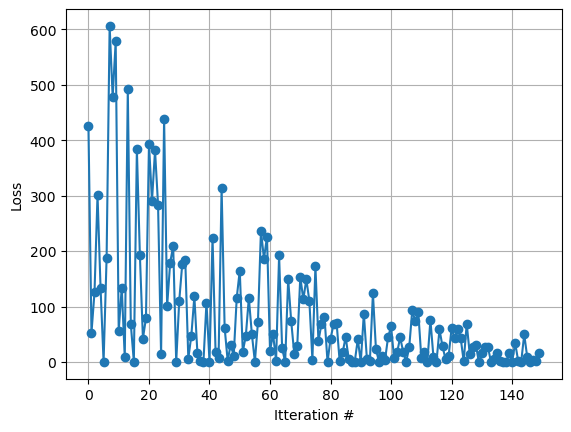

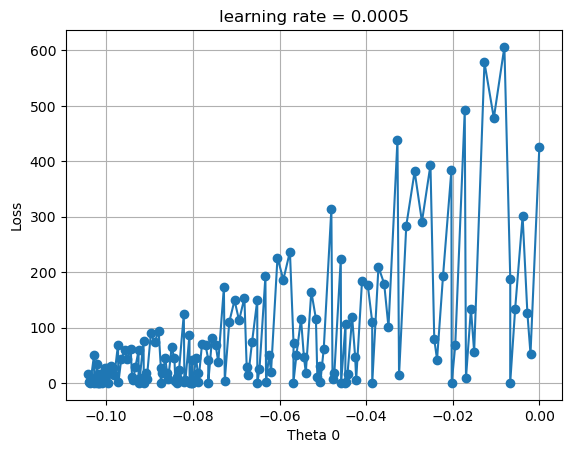

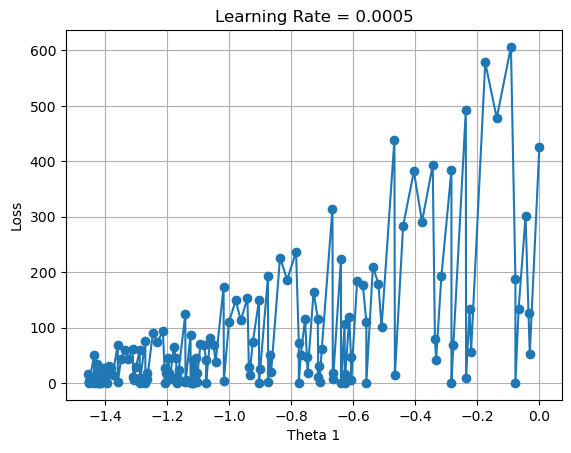

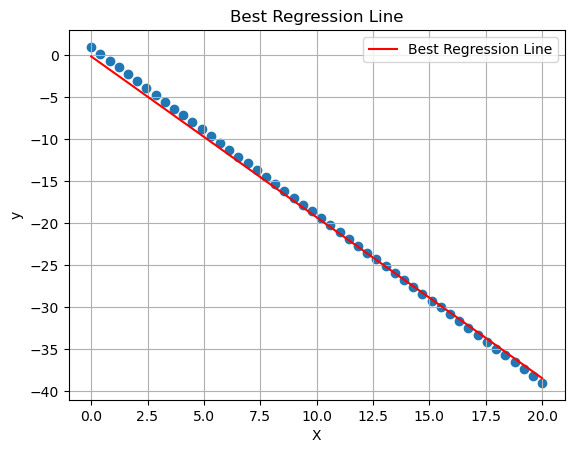

In [201]:
# Plot loss vs. itterations
plt.plot(loss_St, '-o')
plt.xlabel('Itteration #')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_0 vs. loss
plt.plot(all_theta_0_St, loss_St, '-o')
plt.title('learning rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_1 vs. loss
plt.plot(all_theta_1_St, loss_St, '-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot the best regression line
plt.scatter(X, y, marker='o')
plt.plot(X, predicted_y, color='red', label='Best Regression Line')
plt.title('Best Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [279]:
np.random.seed(101)
data = np.column_stack((X,y))
data = shuffle(data)
X = data[:,:-1]
y = data[:,-1]

print(X)
print(y)

[[15.10204082]
 [ 5.71428571]
 [ 8.57142857]
 [13.06122449]
 [ 8.97959184]
 [ 0.40816327]
 [10.6122449 ]
 [18.7755102 ]
 [17.14285714]
 [19.18367347]
 [ 6.53061224]
 [ 9.79591837]
 [ 2.85714286]
 [18.36734694]
 [ 7.34693878]
 [ 1.2244898 ]
 [16.73469388]
 [12.24489796]
 [ 6.12244898]
 [ 8.16326531]
 [17.55102041]
 [15.51020408]
 [17.95918367]
 [15.91836735]
 [ 4.08163265]
 [20.        ]
 [10.20408163]
 [13.46938776]
 [14.69387755]
 [ 0.81632653]
 [11.02040816]
 [13.87755102]
 [14.28571429]
 [ 3.26530612]
 [ 7.75510204]
 [11.83673469]
 [ 4.89795918]
 [ 2.04081633]
 [ 0.        ]
 [11.42857143]
 [ 1.63265306]
 [16.32653061]
 [ 5.30612245]
 [ 3.67346939]
 [19.59183673]
 [ 9.3877551 ]
 [ 2.44897959]
 [ 6.93877551]
 [ 4.48979592]
 [12.65306122]]
[-29.20408163 -10.42857143 -16.14285714 -25.12244898 -16.95918367
   0.18367347 -20.2244898  -36.55102041 -33.28571429 -37.36734694
 -12.06122449 -18.59183673  -4.71428571 -35.73469388 -13.69387755
  -1.44897959 -32.46938776 -23.48979592 -11.2448979

In [285]:
def mbatch_GD_LR_1var(X, y, alpha, epoch, batch_size):
    np.random.seed(101)
    data = np.column_stack((X,y))
    data = shuffle(data)
    X = data[:,:-1].flatten()
    y = data[:,-1]

    theta_0_Mb = 0
    theta_1_Mb = 0
    m =len(y)
    stopping_threshold = 0.001
    converging_threshold = 0.001
    loss_Mb = []
    all_theta_0_Mb = []
    all_theta_1_Mb = []
    hypothesis_output = []

    for i in range(epoch):
        for j in range(0,m,batch_size):
            X_batch = X[j:j+batch_size]
            y_batch = y[j:j+batch_size]
            all_theta_0_Mb.append(theta_0_Mb)
            all_theta_1_Mb.append(theta_1_Mb)
            
            predicted_y = theta_0_Mb + theta_1_Mb * X_batch
            hypothesis_output.append(predicted_y)
            error_vector = predicted_y - y_batch
            
            mse=np.sum(error_vector**2)/(2*batch_size)
            loss_Mb.append(mse)

            d_theta_0_Mb =np.sum(error_vector) / batch_size
            d_theta_1_Mb =np.sum((error_vector) * X_batch) / batch_size
            
            grad_vector = np.array([d_theta_0_Mb, d_theta_1_Mb])
            grad_vector_norm = np.linalg.norm(grad_vector)
            
            if grad_vector_norm < stopping_threshold:
                return all_theta_0_Mb, all_theta_1_Mb, loss_Mb, theta_0_Mb, theta_1_Mb

            theta_0_Mb -= alpha * d_theta_0_Mb
            theta_1_Mb -= alpha * d_theta_1_Mb

        print(f"****************** Epoch {i} ********************\n")
        print('h(x):\n',predicted_y)
        print('\nError Vector:\n',error_vector)
        print('\nj = ',mse)
        print('\nGradient Vector:\n', grad_vector)
        print('\nGradient Vector Norm:', grad_vector_norm)
        print("\ntheta_0_opt :", theta_0_Mb)
        print("theta_1_opt :", theta_1_Mb)
        
        if ((i > 1) and (abs(loss_Mb[-1] - loss_Mb[-int(np.ceil(m/batch_size) +1)]) < converging_threshold)):
            break
    print("****************** Training Report ********************\n")
    print(f"Gradient Descent converged after {i} epochs")
    print("\ntheta_0_opt :", theta_0_Mb)
    print("theta_1_opt :", theta_1_Mb)
    print('\ncost =', mse)
    return all_theta_0_Mb, all_theta_1_Mb, loss_St, theta_0_Mb, theta_1_Mb,loss_Mb

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [286]:
all_theta_0_Mb, all_theta_1_Mb, loss_St, theta_0_Mb, theta_1_Mb, loss_Mb = mbatch_GD_LR_1var(X,y,0.0005,300,5)

****************** Epoch 0 ********************

h(x):
 [-14.14224699  -9.44957749 -10.8934758   -8.72762833 -12.33737411]

Error Vector:
 [16.6944877  10.77491231 12.59632012  9.8642084  14.41772793]

j =  85.86454214454457

Gradient Vector:
 [ 12.86953129 166.20947716]

Gradient Vector Norm: 166.70697385759368

theta_0_opt : -0.07067324367627927
theta_1_opt : -0.9674924530768765
****************** Epoch 1 ********************

h(x):
 [-22.47387257 -15.01649869 -17.31107527 -13.8692104  -19.60565185]

Error Vector:
 [8.36286212 5.20799111 6.17872065 4.72262634 7.14945019]

j =  20.865506065740338

Gradient Vector:
 [ 6.32433008 81.90574282]

Gradient Vector Norm: 82.14954569958607

theta_0_opt : -0.10491308420605316
theta_1_opt : -1.4463810266046533
****************** Epoch 2 ********************

h(x):
 [-26.59751114 -17.77153397 -20.48721925 -16.41369133 -23.20290453]

Error Vector:
 [4.23922356 2.45295582 3.00257667 2.1781454  3.55219751]

j =  5.036589980937437

Gradient Vector:
 

In [290]:
predicted_y = theta_0_Mb+theta_1_Mb*X

In [288]:
r2_score(y, theta_0_Mb+theta_1_Mb*X)

0.9976219073512973

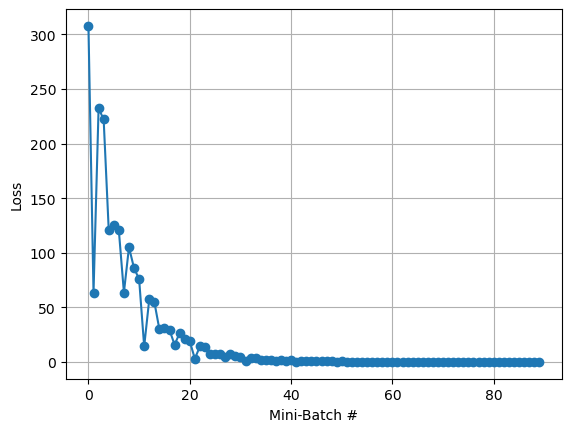

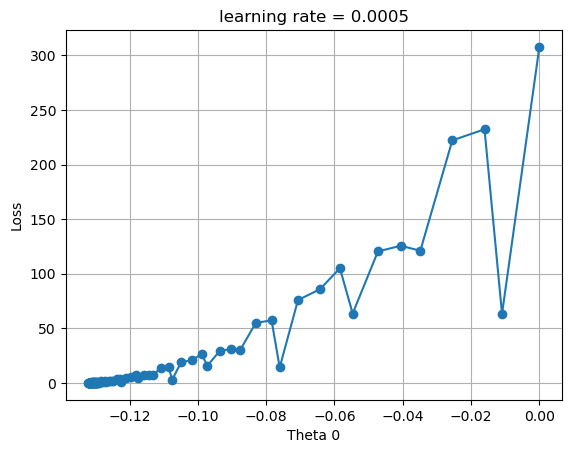

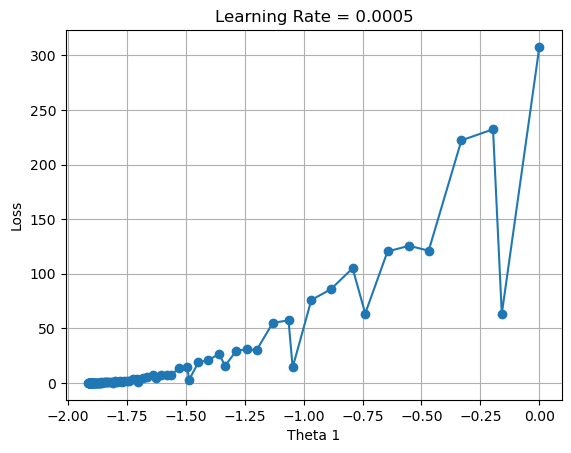

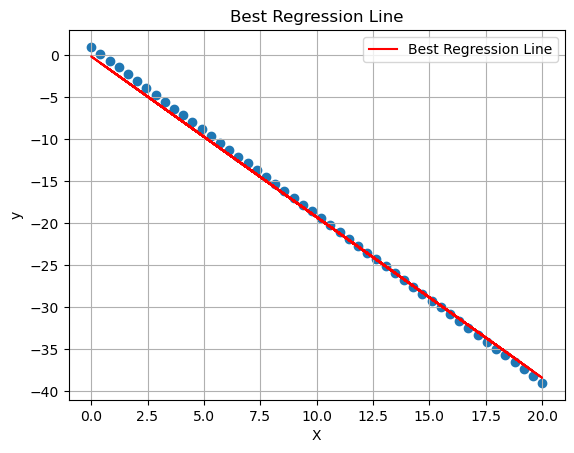

In [291]:
# Plot loss vs. mini-batch
plt.plot(loss_Mb, '-o')
plt.xlabel('Mini-Batch #')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_0 vs. loss
plt.plot(all_theta_0_Mb, loss_Mb, '-o')
plt.title('learning rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_1 vs. loss
plt.plot(all_theta_1_Mb, loss_Mb, '-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot the best regression line
predicted_y = theta_0_Mb+theta_1_Mb*X
plt.scatter(X, y, marker='o')
plt.plot(X, predicted_y, color='red', label='Best Regression Line')
plt.title('Best Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [292]:
all_theta_0_Mb, all_theta_1_Mb, loss_St, theta_0_Mb, theta_1_Mb, loss_Mb = mbatch_GD_LR_1var(X,y,0.0005,300,10)

****************** Epoch 0 ********************

h(x):
 [-4.05374037 -0.76414511 -8.25711208 -8.62262267 -2.04343215 -7.16058033
 -4.78476153 -5.5157827  -4.41925095 -6.24680387]

Error Vector:
 [12.90544331  1.50116101 27.4775818  28.74472427  5.93615968 23.67615436
 15.43972826 17.97401322 14.17258578 20.50829817]

j =  176.43908725754463

Gradient Vector:
 [ 16.83358499 238.53726217]

Gradient Vector Norm: 239.13049790292882

theta_0_opt : -0.04154073483303155
theta_1_opt : -0.5670190964358164
****************** Epoch 1 ********************

h(x):
 [ -7.98606423  -1.5049211  -16.2675249  -16.98765191  -4.02536565
 -14.10714385  -9.42631826 -10.86657229  -8.70619124 -12.30682632]

Error Vector:
 [ 8.97311944  0.76038502 19.46716898 20.37969503  3.95422619 16.72959084
 10.79817154 12.62322363  9.88564549 14.44827572]

j =  87.66688756230383

Gradient Vector:
 [ 11.80195019 168.09040833]

Gradient Vector Norm: 168.50421775724536

theta_0_opt : -0.07056804360668677
theta_1_opt : -0.9662

In [293]:
r2_score(y, predicted_y)

0.9976219073512973

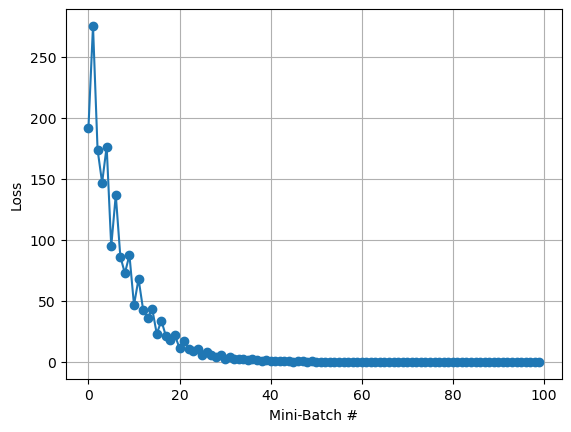

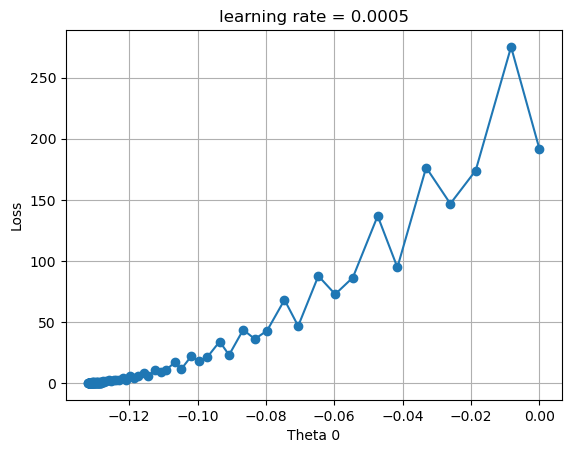

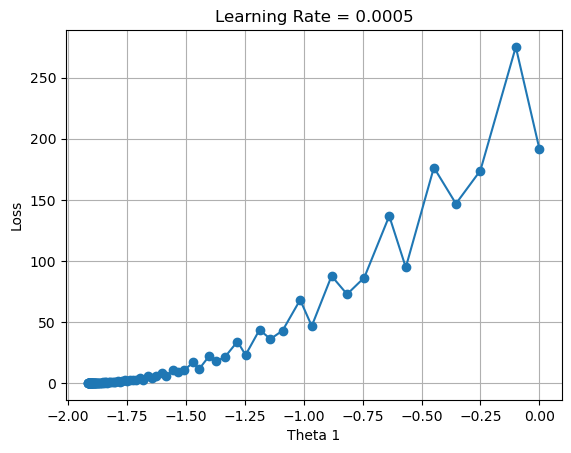

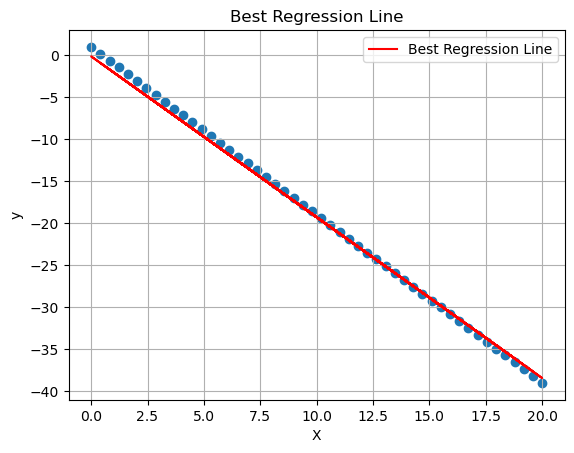

In [294]:
# Plot loss vs. mini-batch
plt.plot(loss_Mb, '-o')
plt.xlabel('Mini-Batch #')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_0 vs. loss
plt.plot(all_theta_0_Mb, loss_Mb, '-o')
plt.title('learning rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_1 vs. loss
plt.plot(all_theta_1_Mb, loss_Mb, '-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot the best regression line
predicted_y = theta_0_Mb+theta_1_Mb*X
plt.scatter(X, y, marker='o')
plt.plot(X, predicted_y, color='red', label='Best Regression Line')
plt.title('Best Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [295]:
all_theta_0_Mb, all_theta_1_Mb, loss_St, theta_0_Mb, theta_1_Mb, loss_Mb = mbatch_GD_LR_1var(X,y,0.0005,300,20)

****************** Epoch 0 ********************

h(x):
 [-2.15957797 -0.40709057 -4.39886742 -4.59358824 -1.08861345 -3.81470496
 -2.54901961 -2.93846126 -2.35429879 -3.3279029 ]

Error Vector:
 [14.7996057   1.85821555 31.33582646 32.7737587   6.89097839 27.02202974
 17.67547018 20.55133466 16.23753794 23.42719914]

j =  115.08702869193034

Gradient Vector:
 [  9.62859782 136.23450827]

Gradient Vector Norm: 136.57434289910722

theta_0_opt : -0.022463227884539406
theta_1_opt : -0.30665026091952424
****************** Epoch 1 ********************

h(x):
 [-4.58964577 -0.8649456  -9.34898489 -9.76284047 -2.31344011 -8.10741816
 -5.41735693 -6.24506808 -5.00350135 -7.07277923]

Error Vector:
 [12.3695379   1.40036052 26.38570899 27.60450647  5.66615173 22.72931653
 14.80713287 17.24472784 13.58833538 19.68232281]

j =  81.26441278235345

Gradient Vector:
 [  8.07390505 114.46770027]

Gradient Vector Norm: 114.75209081853694

theta_0_opt : -0.04127139965522487
theta_1_opt : -0.564206929792

In [296]:
r2_score(y, predicted_y)

0.9976352708499678

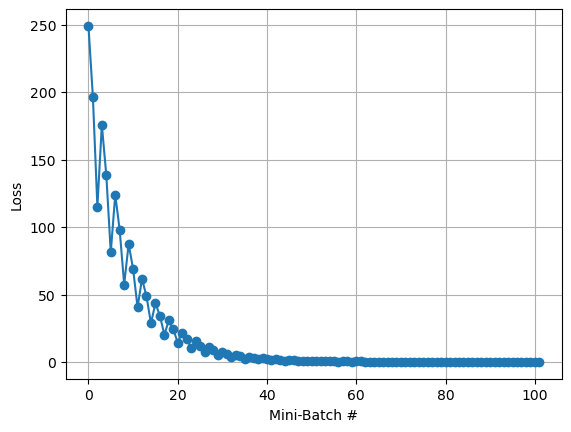

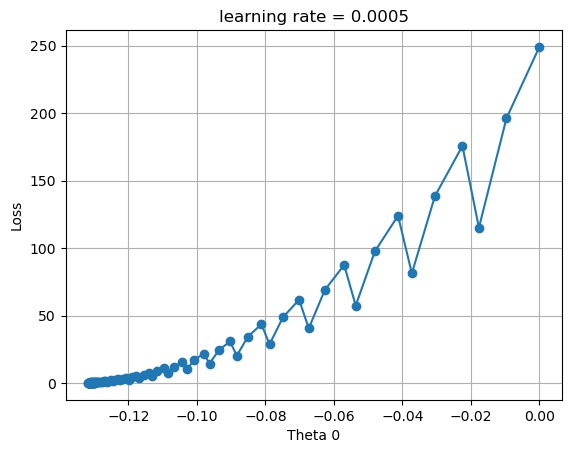

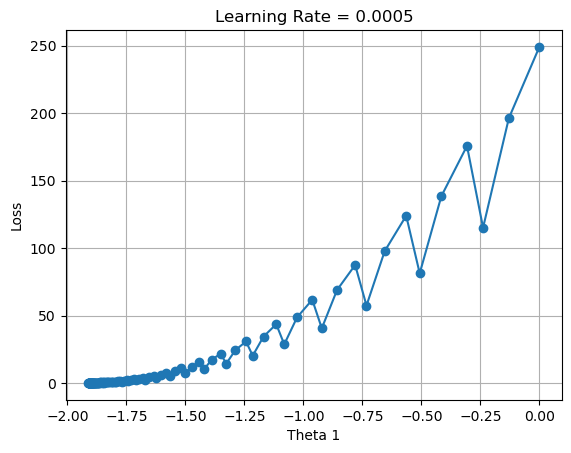

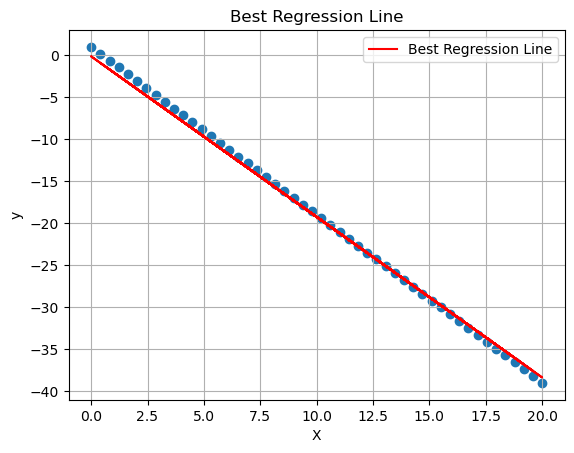

In [297]:
# Plot loss vs. mini-batch
plt.plot(loss_Mb, '-o')
plt.xlabel('Mini-Batch #')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_0 vs. loss
plt.plot(all_theta_0_Mb, loss_Mb, '-o')
plt.title('learning rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot Theta_1 vs. loss
plt.plot(all_theta_1_Mb, loss_Mb, '-o')
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Plot the best regression line
predicted_y = theta_0_Mb+theta_1_Mb*X
plt.scatter(X, y, marker='o')
plt.plot(X, predicted_y, color='red', label='Best Regression Line')
plt.title('Best Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()